Let's predict students' scores based on their study hours; however, study hours are one of the factors responsible for growth in students' scores or high scores, and the score is not entirely dependent.

Here we are importing pandas,matplotlib.pyplot, seaborn, and numpy

***Pandas*:-used to store, clean, and manipulate data.**

***matplotlib*:-Used for visualizing data into graphs, charts, etc.**

***seaborn*:-it is also a data visualization library build on matplotlib.**

***numpy*:-it is a core math library.**



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:

# This creates a dataframe
# Dataframe is a 2d table-like structure like Google Sheets
df = pd.read_csv('/kaggle/input/students-score-and-hour/student_scores.csv')

# We are printing the whole data set here just to check if there is any need for cleaning
# For starters, we are working on a very small dataset, so we can check if there is need of cleaning or not
print(df)



    Hours  Scores
0     1.5      20
1     2.0      25
2     2.5      30
3     3.0      35
4     3.5      45
5     4.0      50
6     4.5      55
7     5.0      60
8     5.5      65
9     6.0      70
10    6.5      75
11    7.0      80
12    7.5      85
13    8.0      90
14    8.5      92
15    9.0      95
16    9.5      97
17   10.0     100


As we can see, the data is clean and there are no missing values or null or undefined values, so we can now move to the visualizing step and skip cleaning, usally cleaning includes, geting satictics values and replacing them with with missing values in some cases

Here we are using scatter plot for visualizing data

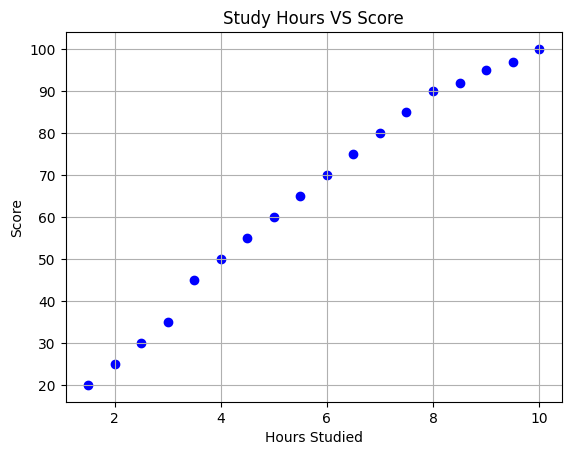

In [3]:

# this is a scatter function, this visualize by scattering dots on graph
plt.scatter(df['Hours'], df['Scores'],color='blue')

# this is title which sets a title for graph
plt.title('Study Hours VS Score')

# this is x-axis lable
plt.xlabel('Hours Studied')

# this is y-axis lable
plt.ylabel('Score')

# this sets grid which makes points easy to see (tho this is optional)
plt.grid(True)

# finally this shows the graph
plt.show()

Now that we have visualized the data, let's train our model.

But first we have to make 2 components: test and train, for the data to test and not get the model to remember and write it

In [4]:
X = X = df['Hours'].values.reshape(-1, 1)
y = df['Scores'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

Now that we have divided data into training and test data let's build a model 

In [5]:
# we are creating a model of linear regression so,  we are using a function from scikit 
# this allows us to create a empty brain 
model = LinearRegression()

# Here we are using fit method to tell our model to check the right equation 
model.fit(X_train,y_train)


LinearRegression()

In this case, the equation will be,
Score = m⋅ Hours + c
So there will be a straight line with slope m and constant c

Let's check if we are right or not by printing value of m and c

In [6]:
# this shows how much increase will be there for each hour 
print("Slope (m):", model.coef_[0])
# this shows how much a student will score if he study for 0 hour
print("Intercept (c):", model.intercept_)


Slope (m): [9.47561805]
Intercept (c): [10.81832615]


Great now that we have trained the model, it's time to test it

In [7]:
# here we are using test variables to predict the score so we can check 
# and calculate error
y_pred = model.predict(X_test)

after creating variable we have to test it using 3 factors

**Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)** and **R² Score**

Mean Absolute Error (MAE) tells us how much off our predicted score is from the actual score on average 

Mean Squared Error (MSE) tells us that are there any huge erros that is messing up model

R² Score tells us the probability of right prediction

In [8]:
# After predicting, we are checking Mean Absolute Error,
# Mean Squared Error (MSE) and R² Score
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 3.2865729190292488
Mean Squared Error (MSE): 13.492761512115447
R² Score: 0.9600214473715097


we got the value, but how will we know if this is good or not?

This is the "We consider this good" criteria to check if the problem is good or needs more correction

MAE < 5 is excellent for this kind of problem
R² Score > 0.90 is considered a powerful model


Now that we have created a model, tested it it's time to predict some values


In [9]:
predicted_score = model.predict([[6.5]])
print("Predicted Score for 6.5 hours:", predicted_score[0])

Predicted Score for 6.5 hours: [72.4098435]


With this, we have successfully created a linear regression model that predicts score based on hours spent studying